# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Alumnos:
Apezteguia - Mannarino - Navajas Jauregui

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [53]:
# Usamos la API de Mercado Libre, para interactuar con el sistema mediante código.
# Haremos un GET request. Importamos la libreria requests
import requests

# Definimos el item que queremos buscar.
buscar = "Cafetera Oster con molinillo"

# Sabemos que tenemos 50 resultados por página.
tamano_pagina = 50

# Creamos una lista para almacenar todos los resultados.
todos_los_resultados = []

# Inicializamos la variable de página en 1.
pagina = 1

# Haremos un loop para que guarde los datos de cada página hasta que no haya más. 
while True:
    # Utilizamos la URL propuesta por Mercado Libre, se encuentra en: https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas
    # Tomamos /sites/$SITE_ID/search?q=Motorola%20G6 - para obtener ítems de una consulta de búsqueda.
    # Definimos la URL, le agregamos las llaves para completar. La primera corresponde a MLA - Argentina.
    # La segunda llave corresponde al buscar que definimos antes y que reemplace los espacios por %20.
    url = "https://api.mercadolibre.com/sites/{}/search?q={}&offset={}&limit={}".format("MLA", buscar.replace(" ", "%20"), (pagina - 1) * tamano_pagina, tamano_pagina)

    # Utilizamos la librería "requests" con el método "get" para hacer la solicitud.
    response = requests.get(url)

    # Verificamos si la solicitud fue exitosa (código de respuesta 200)
    if response.status_code == 200:
        # Una vez que tenemos la búsqueda, la guardamos en un diccionario json.
        data = response.json()

        # Agregamos los resultados de esta página a la lista de todos los resultados
        todos_los_resultados.extend(data['results'])

        # Verificamos si hay más páginas disponibles
        total_resultados = data['paging']['total']
        resultados_pagina_actual = len(data['results'])
        # Si el resultado de la pagina actual es menor al tamaño o si ya hemos recopilado todos los resultados disponibles, para.
        if resultados_pagina_actual < tamano_pagina or len(todos_los_resultados) >= total_resultados:
            # Solicitamos que pare el loop cuando no haya más páginas o haya capturado todos los resultados. 
            break  

        # Incrementamos la variable de página para obtener la siguiente página
        pagina += 1
    else:
        # Si no se cumple lo anterior:
        print("Error en la solicitud")
        # terminar el loop si hay un error
        break  

# Imprimimos la cantidad total de resultados obtenidos
print("Cantidad total de resultados:", len(todos_los_resultados))

# Puedes procesar o analizar los resultados como desees
# Por ejemplo, puedes imprimir los precios de los productos
# Imprimir los precios de los primeros 5 productos
for i, producto in enumerate(todos_los_resultados[:5]):
    if 'price' in producto:
        print(f"Precio del producto {i + 1}: {producto['price']}")

# Podesmos solicitar el link de algún producto, en este caso el primero (0)
print(data['results'][0]['permalink'])        



Cantidad total de resultados: 49
Precio del producto 1: 494999
Precio del producto 2: 52783
Precio del producto 3: 230722.85
Precio del producto 4: 363488.05
Precio del producto 5: 71030
https://www.mercadolibre.com.ar/oster-perfect-brew-bvstem7300-acero-inoxidable-220v/p/MLA15157343


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [55]:
# Comenzamos instalanado el paquete panda e importando 
import pandas as pd

# Creamos una lista de precios a partir de los datos.
# producto['price'] if 'price' in producto else None = Verifica si la clave 'price' 
# está presente en el diccionario producto. Si está presente, toma el valor de 'price' y lo agrega a la lista precios
precios = [producto['price'] if 'price' in producto else None for producto in data['results']]

# Creamos un DataFrame con la lista de precios.
dataframe = pd.DataFrame({'Precio': precios})

# Calculamos el precio promedio, mínimo y máximo.
precio_promedio = dataframe['Precio'].mean()
precio_minimo = dataframe['Precio'].min()
precio_maximo = dataframe['Precio'].max()

# Solicitamos que los valores cuenten hasta con dos decimales. 
precio_promedio = round(precio_promedio, 2)
precio_minimo = round(precio_minimo, 2)
precio_maximo = round(precio_maximo, 2)

# Imprimimos los resultados.
print(f"Precio Promedio: {precio_promedio}")
print(f"Precio Mínimo: {precio_minimo}")
print(f"Precio Máximo: {precio_maximo}")

Precio Promedio: 319125.52
Precio Mínimo: 6220.37
Precio Máximo: 1289700.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

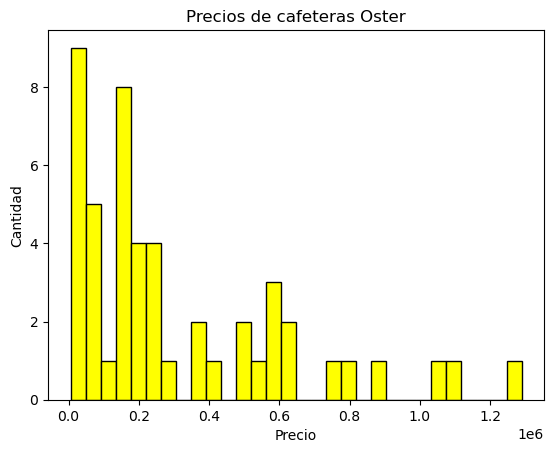

In [56]:
# Importamos la librería Matplotlib
import matplotlib.pyplot as plt

# Creamos un histograma de precios
# Definimos los parámetros. Especificamos una distribución de 30 barras para notar faiclmente el outlier.
# Utilizamos el color amarillo y negro para cubrir las barras.
plt.hist(precios, bins=30, color='yellow', edgecolor='black')
# En el eje X colocamos los precios.
plt.xlabel('Precio')
# Establecemos la cantidad en el Y.
plt.ylabel('Cantidad')
# Colocamos el título del histograma
plt.title('Precios de cafeteras Oster')
# Mostramos el histograma. 
plt.show()

# Podemos visualizar 4 outliers que se ubican en la cola de la dsitribución. Estas cuatros osbervaciones tienen un valor superior
# al millón de pesos, cuando el promedio se ubicaba en $319,125.52.
